Goal: Visualize indicators by state

In [ ]:
pip install pyshp #installing Shapefile Library to map potential location data 

     |████████████████████████████████| 225kB 7.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=dea53f2e58ceee8f54dca8562e4d041a518eee1079dfcec79399bb963b8d44d1
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import shapefile as shp
#print(pd.__version__)
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%pwd

'/content'

In [ ]:
%ls

drive/  sample_data/


In [ ]:
%cd 'drive'

/content/drive


In [ ]:
%ls

MyDrive/


In [ ]:
%cd 'MyDrive/Twisted Data' 
#everyone will have to have a shortcut to the Twisted Data 
#folder on their MyDrive for this to work

/content/drive/.shortcut-targets-by-id/1eGaPaIhu4xNQlvibLYRqd9dwd0CzLXKx/Twisted Data


In [ ]:
%ls

 ChronicIndicatorsDataviz.ipynb  'Milestone 2 Writeup.gdoc'
'DSGT Bootcamp Proposal.gdoc'     U.S._Chronic_Disease_Indicators.csv


In [ ]:
df = pd.read_csv('U.S._Chronic_Disease_Indicators.csv')
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,10,18,19,20,21,23,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,GeoLocation,ResponseID,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,22,22.00,NaN,NaN,19.7,24.5,Overall,Overall,NaN,NaN,NaN,NaN,"(64.84507995700051, -147.72205903599973)",NaN,2,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AL,Alabama,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,30.7,30.70,NaN,NaN,27.3,34.3,Overall,Overall,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",NaN,1,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2015,2015,AR,Arkansas,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,27.6,27.60,NaN,NaN,24.5,30.8,Overall,Overall,NaN,NaN,NaN,NaN,"(34.74865012400045, -92.27449074299966)",NaN,5,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2015,2015,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,34.8,34.80,NaN,NaN,29.7,40.2,Overall,Overall,NaN,NaN,NaN,NaN,"(34.865970280000454, -111.76381127699972)",NaN,4,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2015,2015,CA,California,YRBSS,Alcohol,Alcohol use among youth,NaN,%,Crude Prevalence,28.9,28.90,NaN,NaN,23.6,34.7,Overall,Overall,NaN,NaN,NaN,NaN,"(37.63864012300047, -120.99999953799971)",NaN,6,ALC,ALC1_1,CrdPrev,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403979,2001,2001,VT,Vermont,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.17,18.17,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(43.62538123900049, -72.51764079099962)",NaN,50,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403980,2001,2001,WA,Washington,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.8,18.80,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(47.52227862900048, -120.47001078999972)",NaN,53,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403981,2001,2001,WI,Wisconsin,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,18.87,18.87,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(44.39319117400049, -89.81637074199966)",NaN,55,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN
403982,2001,2001,WV,West Virginia,"NVSS, Mortality",Overarching Conditions,Life expectancy at age 65 years,NaN,Years,Number,16.8,16.80,NaN,NaN,NaN,NaN,Overall,Overall,NaN,NaN,NaN,NaN,"(38.66551020200046, -80.71264013499967)",NaN,54,OVC,OVC4_2,Nmbr,OVERALL,OVR,NaN,NaN,NaN,NaN


In [ ]:
byStateDF = df[['LocationAbbr','LocationDesc', 'Topic', 'Question','GeoLocation']]
byStateDF

,LocationAbbr,LocationDesc,Topic,Question,GeoLocation
0,AK,Alaska,Alcohol,Alcohol use among youth,"(64.84507995700051, -147.72205903599973)"
1,AL,Alabama,Alcohol,Alcohol use among youth,"(32.84057112200048, -86.63186076199969)"
2,AR,Arkansas,Alcohol,Alcohol use among youth,"(34.74865012400045, -92.27449074299966)"
3,AZ,Arizona,Alcohol,Alcohol use among youth,"(34.865970280000454, -111.76381127699972)"
4,CA,California,Alcohol,Alcohol use among youth,"(37.63864012300047, -120.99999953799971)"
...,...,...,...,...,...
403979,VT,Vermont,Overarching Conditions,Life expectancy at age 65 years,"(43.62538123900049, -72.51764079099962)"
403980,WA,Washington,Overarching Conditions,Life expectancy at age 65 years,"(47.52227862900048, -120.47001078999972)"
403981,WI,Wisconsin,Overarching Conditions,Life expectancy at age 65 years,"(44.39319117400049, -89.81637074199966)"
403982,WV,West Virginia,Overarching Conditions,Life expectancy at age 65 years,"(38.66551020200046, -80.71264013499967)"


In [ ]:
byStateDF.isnull().sum() #no null data found

LocationAbbr       0
LocationDesc       0
Topic              0
Question           0
GeoLocation     2568
dtype: int64

In [ ]:
byStateDF.dropna(axis=0) 

,LocationAbbr,LocationDesc,Topic,Question,GeoLocation
0,AK,Alaska,Alcohol,Alcohol use among youth,"(64.84507995700051, -147.72205903599973)"
1,AL,Alabama,Alcohol,Alcohol use among youth,"(32.84057112200048, -86.63186076199969)"
2,AR,Arkansas,Alcohol,Alcohol use among youth,"(34.74865012400045, -92.27449074299966)"
3,AZ,Arizona,Alcohol,Alcohol use among youth,"(34.865970280000454, -111.76381127699972)"
4,CA,California,Alcohol,Alcohol use among youth,"(37.63864012300047, -120.99999953799971)"
...,...,...,...,...,...
403979,VT,Vermont,Overarching Conditions,Life expectancy at age 65 years,"(43.62538123900049, -72.51764079099962)"
403980,WA,Washington,Overarching Conditions,Life expectancy at age 65 years,"(47.52227862900048, -120.47001078999972)"
403981,WI,Wisconsin,Overarching Conditions,Life expectancy at age 65 years,"(44.39319117400049, -89.81637074199966)"
403982,WV,West Virginia,Overarching Conditions,Life expectancy at age 65 years,"(38.66551020200046, -80.71264013499967)"


In [ ]:
byStateDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403984 entries, 0 to 403983
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   LocationAbbr  403984 non-null  object
 1   LocationDesc  403984 non-null  object
 2   Topic         403984 non-null  object
 3   Question      403984 non-null  object
 4   GeoLocation   401416 non-null  object
dtypes: object(5)
memory usage: 15.4+ MB


In [ ]:
for col in byStateDF:
    print(col)
    print(byStateDF[col].value_counts())
    print('*******')

LocationAbbr
KY    7779
NC    7779
WI    7779
NV    7779
NJ    7779
SC    7779
NE    7779
NY    7778
FL    7747
AZ    7747
IA    7746
VT    7732
HI    7688
OR    7680
SD    7680
WV    7680
NM    7680
WA    7680
MI    7680
AR    7648
CO    7647
MD    7575
UT    7575
RI    7575
MA    7574
CA    7542
MS    7533
VA    7386
MT    7386
ND    7386
KS    7386
WY    7386
MO    7386
PA    7386
OK    7386
OH    7386
TX    7386
LA    7386
MN    7385
IN    7385
ME    7384
TN    7384
NH    7383
GA    7354
IL    7354
AL    7354
AK    7354
ID    7354
CT    7353
DC    7352
DE    7351
PR    5635
GU    5597
VI    5551
US    2568
Name: LocationAbbr, dtype: int64
*******
LocationDesc
North Carolina          7779
South Carolina          7779
Kentucky                7779
Wisconsin               7779
New Jersey              7779
Nevada                  7779
Nebraska                7779
New York                7778
Florida                 7747
Arizona                 7747
Iowa                    7746
Vermont  

## Now we will create a scatter plot with the categories per state. 

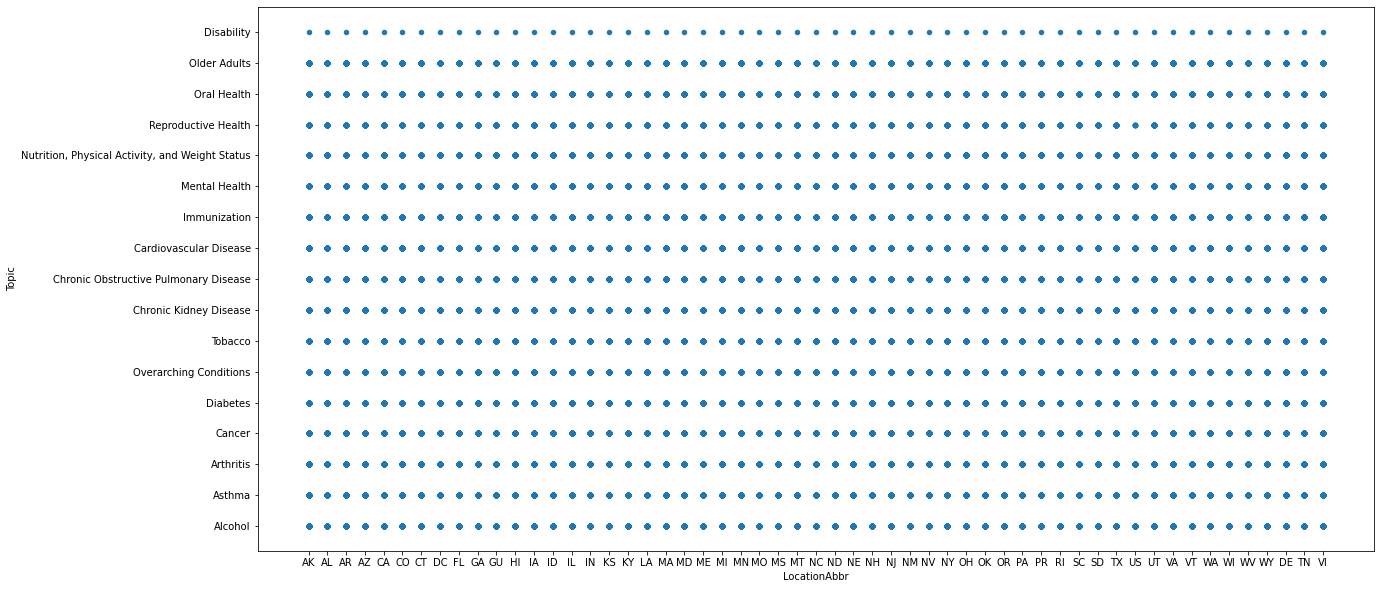

In [ ]:
df.plot(x="LocationAbbr", y="Topic", kind="scatter",figsize = (20,10))

Now that we know the typical chronic conditions that are listed in this data set, we can find connected questions to these topics. Eventually, we can observe which questions & topics are featured most often in each state. 

In [ ]:
byStateDF.groupby('Question').describe()

LocationAbbr  ... GeoLocation
                                                          count  ...        freq
Question                                                         ...            
Activity limitation due to arthritis among adul...         2610  ...          48
Adults aged >= 18 years with arthritis who have...         2610  ...          48
Adults with diagnosed diabetes aged >= 18 years...         4350  ...          80
Alcohol use among youth                                     107  ...           2
Alcohol use before pregnancy                                 55  ...           1
...                                                         ...  ...         ...
Taking medicine for high blood pressure control...         2610  ...          48
Television viewing among high school students               107  ...           2
Timeliness of routine health care checkup among...         1625  ...          30
Visits to dentist or dental clinic among adults...         1724  ...          32
Visits to dentist or dental clinic among adults...         1740  ...          32

[202 rows x 16 columns]

In [ ]:
byStateDF.groupby('Question').count()

,LocationAbbr,LocationDesc,Topic,GeoLocation
Question,,,,
Activity limitation due to arthritis among adults aged >= 18 years,2610,2610,2610,2592
Adults aged >= 18 years with arthritis who have taken a class to learn how to manage arthritis symptoms,2610,2610,2610,2592
Adults with diagnosed diabetes aged >= 18 years who have taken a diabetes self-management course,4350,4350,4350,4320
Alcohol use among youth,107,107,107,105
Alcohol use before pregnancy,55,55,55,54
...,...,...,...,...
Taking medicine for high blood pressure control among adults aged >= 18 years with high blood pressure,2610,2610,2610,2592
Television viewing among high school students,107,107,107,105
Timeliness of routine health care checkup among women aged 18-44 years,1625,1625,1625,1620


In [ ]:
byStateDF.groupby('Topic').count()

,LocationAbbr,LocationDesc,Question,GeoLocation
Topic,,,,
Alcohol,27697,27697,27697,27537
Arthritis,31652,31652,31652,31428
Asthma,31958,31958,31958,31752
Cancer,11605,11605,11605,11519
Cardiovascular Disease,62678,62678,62678,62362
Chronic Kidney Disease,11525,11525,11525,11460
Chronic Obstructive Pulmonary Disease,52536,52536,52536,52176
Diabetes,67342,67342,67342,66921
Disability,55,55,55,54


Our next goal will be to plot each topic and eventually narrow this down by each state. 

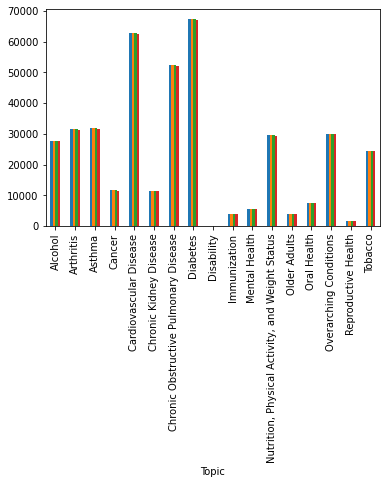

In [ ]:
byStateDF.groupby('Topic').count().plot(kind='bar',legend=None)

In [96]:
byStateDF.groupby('LocationAbbr').describe()
#because every state's most common chronic condition is diabetes, another possibility is finding the questions of interest that are most often asked 

LocationDesc  ... GeoLocation
                    count  ...        freq
LocationAbbr               ...            
AK                   7354  ...        7354
AL                   7354  ...        7354
AR                   7648  ...        7648
AZ                   7747  ...        7747
CA                   7542  ...        7542
CO                   7647  ...        7647
CT                   7353  ...        7353
DC                   7352  ...        7282
DE                   7351  ...        7351
FL                   7747  ...        7747
GA                   7354  ...        7354
GU                   5597  ...        5597
HI                   7688  ...        7688
IA                   7746  ...        7746
ID                   7354  ...        7354
IL                   7354  ...        7354
IN                   7385  ...        7385
KS                   7386  ...        7386
KY                   7779  ...        7779
LA                   7386  ...        7386
MA                   7574  ...        7574
MD                   7575  ...        7575
ME                   7384  ...        7384
MI                   7680  ...        7680
MN                   7385  ...        7385
MO                   7386  ...        7386
MS                   7533  ...        7533
MT                   7386  ...        7386
NC                   7779  ...        7779
ND                   7386  ...        7386
NE                   7779  ...        7779
NH                   7383  ...        7383
NJ                   7779  ...        7779
NM                   7680  ...        7680
NV                   7779  ...        7779
NY                   7778  ...        7778
OH                   7386  ...        7386
OK                   7386  ...        7386
OR                   7680  ...        7680
PA                   7386  ...        7386
PR                   5635  ...        5635
RI                   7575  ...        7575
SC                   7779  ...        7779
SD                   7680  ...        7680
TN                   7384  ...        7384
TX                   7386  ...        7386
US                   2568  ...         NaN
UT                   7575  ...        7575
VA                   7386  ...        7386
VI                   5551  ...        5551
VT                   7732  ...        7732
WA                   7680  ...        7680
WI                   7779  ...        7779
WV                   7680  ...        7680
WY                   7386  ...        7386

[55 rows x 16 columns]

In [109]:
StateDF = df[['LocationAbbr', 'Question']]
StateDF.groupby(['LocationAbbr']).agg(lambda x:x.value_counts().index[0])

,Question
LocationAbbr,
AK,Mortality from coronary heart disease
AL,Mortality from coronary heart disease
AR,Mortality from total cardiovascular diseases
AZ,Mortality with end-stage renal disease
CA,Mortality from coronary heart disease
CO,Mortality from total cardiovascular diseases
CT,Mortality from coronary heart disease
DC,Mortality from coronary heart disease
DE,Mortality with chronic obstructive pulmonary d...
